Dans un premier temps on complète les statistiques descriptives en faisant des nuages de mots afin d'avoir une idée des sujets principaux traités par chaque éditorialiste. 
Sans surprise on retrouve des mots tels que Emmanuel Macron en première ligne, avec une différence marquée pour Dominique Seux, éditorialiste plus orienté économie. 

 L'idée principale est de classifier les éditos selon un échiquier politique. Cependant le premier obstacle auquel on fait face est la définition inexacte des différentes classes politiques (Droite, Gauche, Centre...)
Dans un premier temps nous avons chercher des lexiques de la politique de façon générale (scrapping) : Diplomatie, Franc-Maçonnerie, Socialisme, Relations internationales... Toutefois des catégories politiques générales ne peuvent pas toujours être associées à un bord politique de façon précise. De plus, la définition d'un bord politique  peut être subjective et dépendra des opinions de chacun ou des personnalités politiques en cours pour le parti. Il conviendra donc d'affiner ces lexiques. 
On retrouve toutefois des résultats satisfaisants notamment pour le lexique socialisme avec une prédominance pour Thomas Legrand, éditorialiste reconnu de Gauche. 


Cette première approche reste néanmoins sommaire mais servira de point de comparaison pour la suite du projet dans 
laquelle nous utiliserons le "nouveau" NLP plus adpaté pour une telle analyse. 

Après avoir procédé à ces analyses de type "ancien NLP", nous avons débuté la labellisation des textes. En effet, afin de pouvoir classifier nos textes il est nécessaire de definir au préalable les catégories de classification puis dans un deuxième temps de labelliser un certain nombre de textes qui formeront la base d'apprentissage de notre modèle. Nous procédons à cette labellisation à l'aide du logiciel Doccano. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from functools import reduce
from operator import add
#import spacy
#from spacy import displacy
#from spacy.tokenizer import Tokenizer
#from spacy.lang.fr import French
import mysql.connector
from mysql.connector import Error


In [2]:
df = pd.read_csv("/Users/paolaricou/Documents/Stat-App-/2019-01-08-editos-radio.csv")

In [3]:
L=df['emission'].unique()

#Liste par éditorialistes
Nay=df[df['emission'] == L[0]]
Duhamel=df[df['emission'] == L[1]]
Ventura=df[df['emission'] == L[2]]
Says=df[df['emission'] == L[3]]
Legrand=df[df['emission'] == L[4]]
Seux=df[df['emission'] == L[5]]
Darmon=df[df['emission'] == L[6]]

#Listes par radio
FrInter=Legrand+Seux
FrCulture=Says
Europe1=Nay+Darmon
RTL=Duhamel+Ventura

Radio=[FrInter, FrCulture, Europe1, RTL]
Editorialistes=[Nay, Duhamel, Ventura, Says, Legrand, Seux, Darmon]

In [4]:
#Bref résumé d'éditos lu au hasard

"""E0 (Europe 1 Nay): sur la politique allemande : l'accueil des migrants, l'europe et la réélection de Merkel 
Sujet : Immigration, Europe, Politique, Allemagne(Merkel)
E1000 (FRInter Legrand) 2017_12_01: Politique française : Macron une voie politique en bonne position 
entre deux bords qui se déchirent. Politique
E1151 (Frinter Dominique Seux): Les tentatives de Macron pour attirer les investisseurs étrangers sur 
L'économie française et pourquoi les français ont ils
une si mauvaise opinion sur leur propre économie. Sujet: économie, economie industrielle, politique
E1152: RTL Duhamel	2018-01-22: L'avenir de le l'alliance franco- allemande à la veille des élections allemande. 
Politique Franco-Allemande"""
#Tips : Réélection de Merkel le 14 Mars 2018 
"""E1153 : RTL Ventura : Égalité Homme/Femme, qu'en est-il en france? Des inégalités persistente, 
devrons nous durcir les lois
E1154: FrCulture Says : Les prisons et leur prise en main, comment entretenir une "paix" carcérale, 
en particulier pb des radicalisé. Politique, Justice, Prison. 
E1155: Frinter Legrand: NDDL une cause populaire qui a gagné, les autorités publics et jusqu'où aller pour maintenir
l'ordre (qu'est-il d'ailleurs?). Politique, Autorité publique, Écologie
E1156 : FrInter Seux: L'anglais la langue de l'économie, LREM un parti qui innove en parlant bien anglais, 
rencontre économique à Versailles instauré par Macron

"""

'E1153 : RTL Ventura : Égalité Homme/Femme, qu\'en est-il en france? Des inégalités persistente, \ndevrons nous durcir les lois\nE1154: FrCulture Says : Les prisons et leur prise en main, comment entretenir une "paix" carcérale, \nen particulier pb des radicalisé. Politique, Justice, Prison. \nE1155: Frinter Legrand: NDDL une cause populaire qui a gagné, les autorités publics et jusqu\'où aller pour maintenir\nl\'ordre (qu\'est-il d\'ailleurs?). Politique, Autorité publique, Écologie\nE1156 : FrInter Seux: L\'anglais la langue de l\'économie, LREM un parti qui innove en parlant bien anglais, \nrencontre économique à Versailles instauré par Macron\n\n'

In [5]:
[ 7, 15, 25, 54, 89, 134, 150, 167, 245, 278, 290, 309, 356, 398, 408, 412, 476, 510, 550, 572, 632, 683, 684, 732, 745, 763, 826, 854, 888, 921, 973, 1000]

df['texte'].iloc[1000]


'\n            Le paysage politique de l’ère Macron devient lisible…  \n        \nOui, nous sommes dans un moment de cristallisation politique. Chacun a maintenant les éléments pour commencer à se situer sur le nouvel échiquier après les bouleversements provoqués par l’élection d’Emmanuel Macron. Nous avons un large bloc central qui occupe un espace institutionnel surdimensionné. Espace qui vient encore de s’élargir de quelques pouces par les 2 bouts. Par la gauche d’abord, \xa0\xa0avec l’entrée au gouvernement d’un député PS, certes peu connu, sans scrupule ni colonne vertébrale, mais socialiste quand même\xa0: Oliviers Dussopt nommé secrétaire d’Etat alors qu’il était contre la loi de finance et qu’il avait aussi voté contre les ordonnances, lois signatures du macronisme s’il en est ! Et par la droite avec l’adhésion formelle et logique à LREM de 2 ministres et d’un député ex-LR. Cet empire du milieu gonflé à l’hélium du fait-majoritaire repousse les oppositions sur les extrêmes. Le 

# Scrapping


In [6]:
import urllib
import bs4
import pandas
from urllib import request

In [7]:
#Lexique diplomatie 
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_de_la_diplomatie'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

diplomatie=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        diplomatie.append(x)


In [8]:
#Lexique idéologies politiques 
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Id%C3%A9ologies_politiques_en_fran%C3%A7ais'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

ideologies=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        ideologies.append(x)


In [9]:
# Lexique Franc-maçon
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_de_la_franc-ma%C3%A7onnerie'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

franc_macon=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        franc_macon.append(x)

In [10]:
#Lexique Monarchie 
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_de_la_monarchie'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

monarchie=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        monarchie.append(x)

In [11]:
#Lexique Relations internationales  
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_des_relations_internationales'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

ri=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        ri.append(x)
        


In [12]:
#Lexique du socialisme 
url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_du_socialisme'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

socialisme=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        socialisme.append(x)

In [13]:
#Lexique systèmes électoraux

url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_des_syst%C3%A8mes_%C3%A9lectoraux'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

sys_electoral=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        sys_electoral.append(x)

In [14]:
#Lexique UE

url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_de_l%E2%80%99Union_europ%C3%A9enne'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

UE=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        UE.append(x)

In [15]:
#Lexique Vexillologie

url_mots='https://fr.wiktionary.org/wiki/Cat%C3%A9gorie:Lexique_en_fran%C3%A7ais_de_la_vexillologie'

request_text = request.urlopen(url_mots).read()

page = bs4.BeautifulSoup(request_text, "lxml")

main=page.find('main')
tab=main.findAll('li')

Vex=[]
for x in tab:
    table_body = x.find('a')
    for x in table_body: 
        Vex.append(x)

# Création Matcher

In [16]:
import spacy

# Importe le Matcher
from spacy.matcher import Matcher
#Charge le modèle et crée l'objet nlp
nlp = spacy.load("fr_core_news_sm")

In [17]:
def add_matchers(l, matcher):
    for i in range(len(l)):
        doc = nlp(str(l[i]))
        pattern = []
        for token in doc:
                if (token.pos_ == 'VERB' or token.pos_ == 'AUX'):
                    pattern.append({"LEMMA" : str(token), 'POS' : token.pos_})
                elif token.pos_== 'NOUN':
                    pattern.append({"LEMMA" : str(token), 'POS' : 'NOUN'})
                elif token.pos_== 'DET':
                    pattern.append({'POS' : 'DET'})   
                else:
                    pattern.append({'LOWER' : str(token)})
        matcher.add(str(i), None, pattern)


def expressions_extraction(texte,matcher):
    doc = nlp(texte)
    matches = matcher(doc)
    return([doc[start:end] for match_id, start, end in matches])

def add_feature_matcher(df, expressions):
    matcher = Matcher(nlp.vocab)
    add_matchers(expressions,matcher)
    df['matcher'] = df['texte'].apply(lambda x : expressions_extraction(x, matcher))
    df['taille matcher'] = df['matcher'].apply(len)
    return(df)

In [19]:
matcher = Matcher(nlp.vocab)
L1=[]
for x in Editorialistes:
    M=add_feature_matcher(x, UE)
    k=0
    for i in range (len(M)):
        if M['taille matcher'].iloc[i]!=0:
            k+=M['taille matcher'].iloc[i]
    L1.append(k)

<ipython-input-17-014dcf04d269>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['matcher'] = df['texte'].apply(lambda x : expressions_extraction(x, matcher))
<ipython-input-17-014dcf04d269>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taille matcher'] = df['matcher'].apply(len)


In [20]:
L2=[]
for x in Editorialistes:
    M=add_feature_matcher(x, socialisme)
    k=0
    for i in range (len(M)):
        if M['taille matcher'].iloc[i]!=0:
            k+=M['taille matcher'].iloc[i]
    L2.append(k)

<ipython-input-17-014dcf04d269>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['matcher'] = df['texte'].apply(lambda x : expressions_extraction(x, matcher))
<ipython-input-17-014dcf04d269>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taille matcher'] = df['matcher'].apply(len)


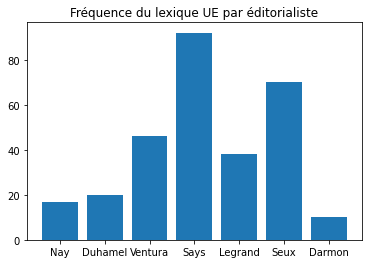

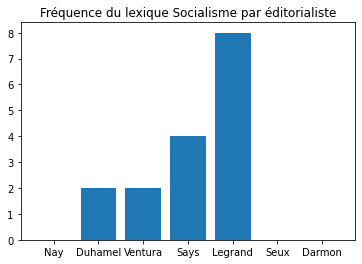

In [21]:
plt.bar(['Nay', 'Duhamel', 'Ventura', 'Says', 'Legrand', 'Seux', 'Darmon'], L1)
plt.title('Fréquence du lexique UE par éditorialiste')
plt.show()
plt.bar(['Nay', 'Duhamel', 'Ventura', 'Says', 'Legrand', 'Seux', 'Darmon'], L2)
plt.title('Fréquence du lexique Socialisme par éditorialiste')
plt.show()

In [22]:

"""for match_id, start, end in matches:
    #print("Correspondance trouvée :", doc[start:end].text)
    print(str(doc[start:end]))"""


'for match_id, start, end in matches:\n    #print("Correspondance trouvée :", doc[start:end].text)\n    print(str(doc[start:end]))'

# Nuages de mots

In [23]:
from wordcloud import WordCloud

In [24]:
#Nuage de mots sur un seul texte 

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()



In [25]:
filtered_sentence =[] 
for x in Nay['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!= 'y':
            filtered_sentence.append(word) 
filtered_Nay=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Legrand['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!= 'y':
            filtered_sentence.append(word) 
filtered_Legrand=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Duhamel['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!= 'y':
            filtered_sentence.append(word) 
filtered_Duhamel=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Seux['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!='y':
            filtered_sentence.append(word) 
filtered_Seux=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Ventura['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!='y':
            filtered_sentence.append(word) 
filtered_Ventura=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Says['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!='y':
            filtered_sentence.append(word) 
filtered_Says=' '.join(filtered_sentence)

filtered_sentence =[] 
for x in Darmon['texte']:
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(x)
    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False and lexeme!='y':
            filtered_sentence.append(word) 
filtered_Darmon=' '.join(filtered_sentence)


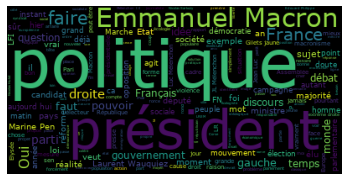

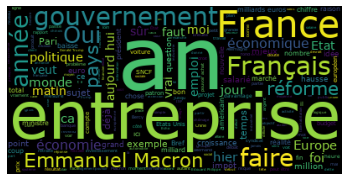

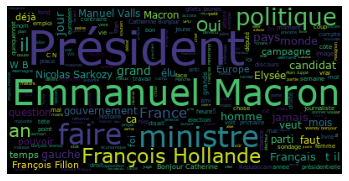

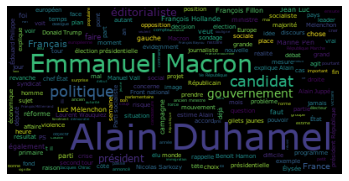

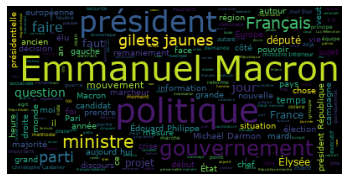

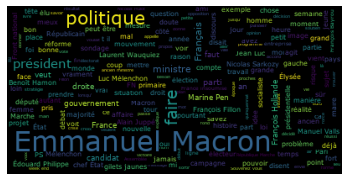

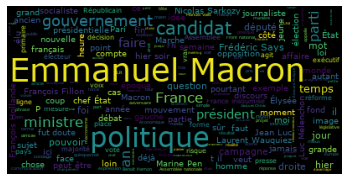

In [26]:
generate_wordcloud(filtered_Legrand)
generate_wordcloud(filtered_Seux)
generate_wordcloud(filtered_Nay)
generate_wordcloud(filtered_Duhamel)
generate_wordcloud(filtered_Darmon)
generate_wordcloud(filtered_Ventura)
generate_wordcloud(filtered_Says)